In [1]:
# impor libraries yang diperlukan
import warnings                        # Library untuk menangani atau mengabaikan peringatan
warnings.filterwarnings("ignore")
import nltk                            # Natural Language Toolkit, digunakan untuk pemrosesan bahasa alami
from nltk.stem import WordNetLemmatizer# Digunakan untuk mengurangi kata-kata menjadi bentuk dasarnya
import json                            # Untuk membaca data dari file JSON
import pickle                          # Untuk menyimpan dan memuat objek Python ke dan dari file
import pandas as pd                    # Library untuk manipulasi dan analisis data
from sklearn.model_selection import train_test_split # Untuk membagi data menjadi data train, val, dan test
from tensorflow import keras           # modul Keras, Library untuk membangun dan melatih model jaringan saraf
import numpy as np                     # Untuk operasi numerik, Dalam JST untuk manipulasi data
from keras.models import Sequential    # Model Keras untuk membuat model JST secara berurutan, lapisan demi lapisan
from keras.layers import Dense, Activation, Dropout 
        # Dense: Lapisan fully connected; setiap neuron terhubung ke semua neuron di lapisan berikutnya
        # Activation: Lapisan aktivasi untuk menentukan fungsi aktivasi yang digunakan oleh neuron
        # Dropout: Lapisan dropout untuk  mencegah overfitting, mengabaikan secara acak sebagian neuron selama pelatihan
from keras.optimizers import SGD       # pengoptimal stokastik gradien (SGD), algoritma optimasi untuk melatih model JST
import random                          # Untuk menghasilkan bilangan acak, berguna pada tahap training atau testing
from keras.models import load_model    # Untuk memuat model JST yang telah disimpan sebelumnya dari file
lemmatizer = WordNetLemmatizer()       # Dari NLTK untuk mengurangi kata-kata menjadi bentuk dasar
# importing the GL Bot corpus file for pre-processing
''' Membaca data dari file JSON ("intents.json") yang berisi informasi untuk membangun chatbot. 
Data ini berisi daftar tag, pola input, dan respons yang sesuai '''
tags = []                              # data tag
inputs = []                            # data input atau pattern
responses = {}                         # data respon
words = []                             # Data kata 
classes = []                           # Data Kelas atau Tag
documents = []                         # Data Kalimat Dokumen
ignore_words = ['?', '!']              # Untuk membersihkan  teks dari karakter yang tidak relevan atau tidak dibutuhkan 
data_file = open("intents.json").read()# Membuka file "intents.json" dan membacanya ke dlm string 
intents = json.loads(data_file)        # Mengonversi string JSON yang telah dibaca dari file ke dlm bentuk objek Python 

In [3]:
'''# preprocessing the json data
# tokenization
nltk.download('punkt')
nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])'''

"# preprocessing the json data\n# tokenization\nnltk.download('punkt')\nnltk.download('wordnet')\nfor intent in intents['intents']:\n    for pattern in intent['patterns']:\n\n        #tokenize each word\n        w = nltk.word_tokenize(pattern)\n        words.extend(w)\n        #add documents in the corpus\n        documents.append((w, intent['tag']))\n\n        # add to our classes list\n        if intent['tag'] not in classes:\n            classes.append(intent['tag'])"

In [2]:
# Iterasi melalui Intents:
for intent in intents['intents']:                # Melakukan iterasi melalui setiap intent dalam data intents
    # Memproses Respon:
      responses[intent['tag']]=intent['responses'] # Membuat kamus `responses` yang memiliki kunci berupa tag intent 
                                                   # dan nilai berupa daftar respons yg terkait dgn intent tersebut
    # Memproses Pola Input:
      for lines in intent['patterns']:             # Iterasi melalui setiap pola input (lines) dalam intent
        inputs.append(lines)                       # Menambahkan setiap pola input ke dalam daftar `inputs`
        tags.append(intent['tag'])                 # Menambahkan tag dari intent ke dalam daftar `tags`
      # TOKENISASI Kata:
        for pattern in intent['patterns']:         # Iterasi melalui setiap pola input dalam intent (pattern)
          w = nltk.word_tokenize(pattern)          # Melakukan tokenisasi kata menggunakan NLTK
          words.extend(w)                          # Menambahkan kata-kata yang di-tokenisasi ke dalam daftar `words`
        # Membuat Data Dokumen:
          documents.append((w, intent['tag']))     # Menambahkan data berisi token kata & tag intent ke dlm `documents`
        # Membuat Daftar Kelas (Classes):
          if intent['tag'] not in classes:         # Menambahkan tag intent ke dalam daftar `classes` jika blm ada
            classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [5]:
data

,patterns,tags
0,hai,intro
1,halo,intro
2,hallo,intro
3,hai asisten,intro
4,halo asisten,intro
...,...,...
853,apa tujuan fungsi kamu dibuat,info
854,apa tujuan fungsi kamu diciptakan,info
855,berikan informasi tentang dirimu kamu anda,info
856,informasi tentang dirimu kamu anda,info


In [3]:
# CASE FOLDING (LOWERCASING), Lowercasing, dan Penghapusan Kata yang Diabaikan: 
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
''' Lematisasi dilakukan untuk mengurangi kata-kata ke bentuk dasar 
    Lowercasing dilakukan agar semua kata menjadi huruf kecil
    Kata-kata yang ada dalam ignore_words dihapus dari daftar kata-kata  '''

# Sortir Daftar Kata dan Kelas:
classes = sorted(list(set(classes)))
''' Daftar classes (tag intents) diurutkan dan diubah menjadi himpunan (set) '''

# Print Informasi Data:
print (len(documents), "documents")                  # documents = combination between patterns and intents
print (len(classes), "classes", classes)             # classes = intents
print (len(words), "unique lemmatized words", words) # words = all words, vocabulary
''' Menampilkan informasi tentang jumlah dokumen (kombinasi antara pola dan intent), 
    jumlah kelas (intents), dan jumlah kata unik dalam vokabuler '''

# Simpan Objek Python ke dalam File Pickle:
pickle.dump(words,open('words.pkl','wb')) 
pickle.dump(classes,open('classes.pkl','wb'))
'''Menyimpan daftar kata (words) dan daftar kelas (classes) ke dlm file pickle,
  dilakukan untuk menyimpan objek Python ke dlm file, yg nantinya dapat digunakan saat 
  memprediksi dengan model tanpa perlu menjalankan proses pemrosesan data lagi '''

19140 documents
47 classes ['ac_hidup', 'ac_mati', 'ac_naik', 'ac_turun', 'bosan', 'gelap', 'hari', 'info', 'intro', 'jam', 'kipas_hidup', 'kipas_mati', 'kipas_naik', 'kipas_turun', 'kran_hidup', 'kran_mati', 'kunci_hidup', 'kunci_mati', 'lampu1_hidup', 'lampu1_mati', 'lampu2_hidup', 'lampu2_mati', 'lampu3_hidup', 'lampu3_mati', 'lampusemua_hidup', 'lampusemua_mati', 'malam', 'musik', 'otolampu_hidup', 'otolampu_mati', 'otopompa_hidup', 'otopompa_mati', 'pagi', 'panas', 'pergi', 'pompa_hidup', 'pompa_mati', 'siang', 'sore', 'suhu', 'tanggal', 'terang', 'terminal_hidup', 'terminal_mati', 'thanks', 'tirai_hidup', 'tirai_mati']
204 unique lemmatized words ['1', '2', '3', 'ac', 'air', 'akan', 'aktif', 'aktifin', 'aktifkan', 'aku', 'anda', 'angin', 'apa', 'apakah', 'apapun', 'ase', 'asisten', 'atas', 'bantu', 'bantuan', 'bantuannya', 'banyak', 'berapa', 'berapakah', 'beri', 'berikan', 'beritahu', 'besarin', 'besarkan', 'bisakah', 'bosan', 'buka', 'butuh', 'capek', 'cepat', 'cepatin', 'colok

'Menyimpan daftar kata (words) dan daftar kelas (classes) ke dlm file pickle,\n  dilakukan untuk menyimpan objek Python ke dlm file, yg nantinya dapat digunakan saat \n  memprediksi dengan model tanpa perlu menjalankan proses pemrosesan data lagi '

In [7]:
''''# create our training data
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
   
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# shuffle features and converting it into numpy arrays
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

print("Training data created")'''

'\'# create our training data\ntraining = []\n\n# create an empty array for our output\noutput_empty = [0] * len(classes)\n\n# training set, bag of words for each sentence\nfor doc in documents:\n    # initialize our bag of words\n    bag = []\n    # list of tokenized words for the pattern\n    pattern_words = doc[0]\n   \n    # lemmatize each word - create base word, in attempt to represent related words\n    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]\n    \n    # create our bag of words array with 1, if word match found in current pattern\n    for w in words:\n        bag.append(1) if w in pattern_words else bag.append(0)\n    # output is a \'0\' for each tag and \'1\' for current tag (for each pattern)\n    output_row = list(output_empty)\n    output_row[classes.index(doc[1])] = 1\n    training.append([bag, output_row])\n\n# shuffle features and converting it into numpy arrays\nrandom.shuffle(training)\ntraining = np.array(training)\n\n# create tr

In [8]:
'''# convert train_x into numpy array
train_x = np.array(train_x)
# Munculkan hasil matriks bag of words
print("(train_x) unique lemmatized words matrix:")
print(train_x)'''

'# convert train_x into numpy array\ntrain_x = np.array(train_x)\n# Munculkan hasil matriks bag of words\nprint("(train_x) unique lemmatized words matrix:")\nprint(train_x)'

In [13]:
# Debug panjang words dan output_empty
print("Panjang words:", len(words))
print("Panjang classes:", len(classes))

# Debug elemen training sebelum konversi ke numpy array
for i, item in enumerate(training):
    bag, output_row = item
    if len(bag) != len(words) or len(output_row) != len(classes):
        print(f"Error pada indeks {i}: Panjang bag={len(bag)}, Panjang output_row={len(output_row)}")

# Tambahkan dtype=object jika konversi tetap diperlukan
training = np.array(training, dtype=object)


Panjang words: 204
Panjang classes: 47


In [21]:
'''# Munculkan hasil label kelas (target)
print("(train_y) classes matrix:")
print(train_y)'''

'# Munculkan hasil label kelas (target)\nprint("(train_y) classes matrix:")\nprint(train_y)'

In [12]:
# Membuat Data Pelatihan, Validasi, dan Test
training = []
output_empty = [0] * len(classes)  # buat array kosong untuk output kita
for doc in documents:              # training set, Pembentukan BAG OF WORD untuk setiap kalimat
    bag = []                         # initialize our bag of words
    pattern_words = doc[0]           # daftar tokenized untuk pola/pattern
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words] 
                                     # lemmatize setiap kata -- buat kata dasar
    for w in words:                  # buat BoW dengan 1, jika kata yang cocok ditemukan dalam pola saat ini
        bag.append(1) if w in pattern_words else bag.append(0)
                                     # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])
    ''' Membuat data pelatihan (training) yang berisi pasangan fitur dan label.
        Setiap kalimat pada documents diubah menjadi representasi vektor bag-of-words, di mana setiap elemen 
        vektor adalah 1 jika kata tersebut ada dalam kalimat, dan 0 jika tidak.
        Label dibuat dalam bentuk vektor dengan 0 di semua kelas kecuali kelas yang sesuai dengan tag kalimat, 
        dimana nilai adalah 1 '''
    # Debug panjang bag dan output_row
    if len(bag) != len(words) or len(output_row) != len(classes):
        print(f"Error pada data: Panjang bag={len(bag)}, Panjang output_row={len(output_row)}")
        print(f"Doc: {doc}")
        break  # Hentikan loop jika ada masalah
# Cek panjang words dan classes
print("Panjang words:", len(words))
print("Panjang classes:", len(classes))

# Mengacak Data Pelatihan
random.shuffle(training)
''' Mengacak data pelatihan untuk memastikan pola yg mungkin terurut tdk mempengaruhi pelatihan model '''
# Konversi Data Pelatihan Menjadi Numpy Array:
training = np.array(training, dtype=object)

# Pembagian Data Menjadi Set Pelatihan, Validasi, dan Pengujian:
train_data, test_val = train_test_split(training, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(test_val, test_size=0.5, random_state=42)
''' Membagi data pelatihan menjadi dua bagian: data pelatihan dan data sisa 
    (yang akan dibagi lagi menjadi data validasi dan data pengujian) '''

# Konversi Data Menjadi Numpy Array:
train_data = np.array(train_data)
val_data = np.array(val_data)
test_data = np.array(test_data)

# Ekstraksi Fitur dan Label dari Data Pelatihan, Validasi, dan Pengujian:
train_x = list(train_data[:,0])
train_y = list(train_data[:,1])
val_x = list(val_data[:,0])
val_y = list(val_data[:,1])
test_x = list(test_data[:,0])
test_y = list(test_data[:,1])
''' Mengekstraksi fitur dan label dari setiap set data, sehingga siap digunakan untuk melatih dan menguji model. 
    Fitur ('_x') adalah vektor BoW, dan label ('_y') adalah vektor yg menunjukkan kelas yang sesuai  '''

Panjang words: 204
Panjang classes: 47


" Mengekstraksi fitur dan label dari setiap set data, sehingga siap digunakan untuk melatih dan menguji model. \n    Fitur ('_x') adalah vektor BoW, dan label ('_y') adalah vektor yg menunjukkan kelas yang sesuai  "

In [14]:
# Membuat Model Neural Network:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))
''' Membuat model jaringan saraf menggunakan Keras. Model ini menggunakan tiga lapisan (Dense) dengan 
    fungsi aktivasi 'relu' utk lapisan tersembunyi dan 'softmax' utk lapisan output. 
    Dropout digunakan utk mencegah overfitting dengan mengabaikan secara acak bbrp neuron selama pelatihan '''

# Mengompilasi Model:
sgd = SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
''' Mengompilasi model dengan menggunakan stochastic gradient descent (SGD) sebagai optimizer. 
    Parameter seperti learning rate, decay, momentum, dan Nesterov digunakan utk mengoptimalkan pelatihan '''

# Melatih Model dan Menyimpannya:
hist = model.fit(train_x, train_y, epochs=160, batch_size=7, validation_data=(val_x, val_y))
model.save('model.h5', hist)              # model telah dilatih dapat digunakan utk kebutuhan selanjutnya

# Pesan/print Output:
print("\n")
print("*"*50)
print("\nModel Created Successfully!")

Epoch 1/160
1914/1914 [==============================] - 31s 15ms/step - loss: 3.2554 - accuracy: 0.1568 - val_loss: 2.4628 - val_accuracy: 0.2992
Epoch 2/160
1914/1914 [==============================] - 18s 10ms/step - loss: 2.2643 - accuracy: 0.3439 - val_loss: 1.5923 - val_accuracy: 0.5716
Epoch 3/160
1914/1914 [==============================] - 21s 11ms/step - loss: 1.6865 - accuracy: 0.4989 - val_loss: 1.0679 - val_accuracy: 0.7569
Epoch 4/160
1914/1914 [==============================] - 22s 11ms/step - loss: 1.2857 - accuracy: 0.6255 - val_loss: 0.7537 - val_accuracy: 0.8286
Epoch 5/160
1914/1914 [==============================] - 20s 10ms/step - loss: 1.0225 - accuracy: 0.7062 - val_loss: 0.5650 - val_accuracy: 0.8791
Epoch 6/160
1914/1914 [==============================] - 20s 10ms/step - loss: 0.8458 - accuracy: 0.7558 - val_loss: 0.4449 - val_accuracy: 0.8976
Epoch 7/160
1914/1914 [==============================] - 21s 11ms/step - loss: 0.7223 - accuracy: 0.7876 - val_loss: 0

In [15]:
# Buat fungsi untuk plotting hasil training
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

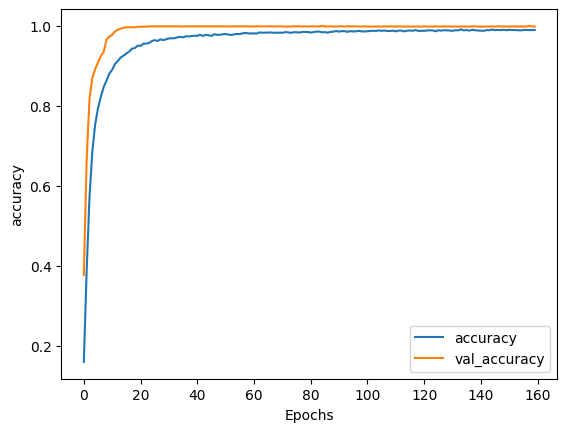

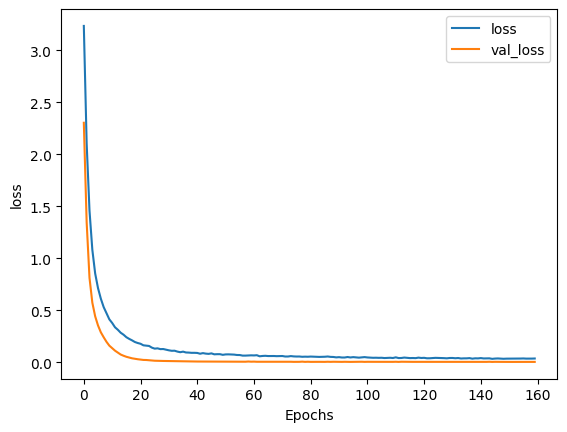

In [8]:
import matplotlib.pyplot as plt
plot_graphs(hist, 'accuracy')
plot_graphs(hist, 'loss')

In [9]:
import tensorflow as tf

# Specify the path to the saved model
model_path = 'model.h5'

# Load the model
model = tf.keras.models.load_model(model_path)


479/479 [==============================] - 1s 2ms/step


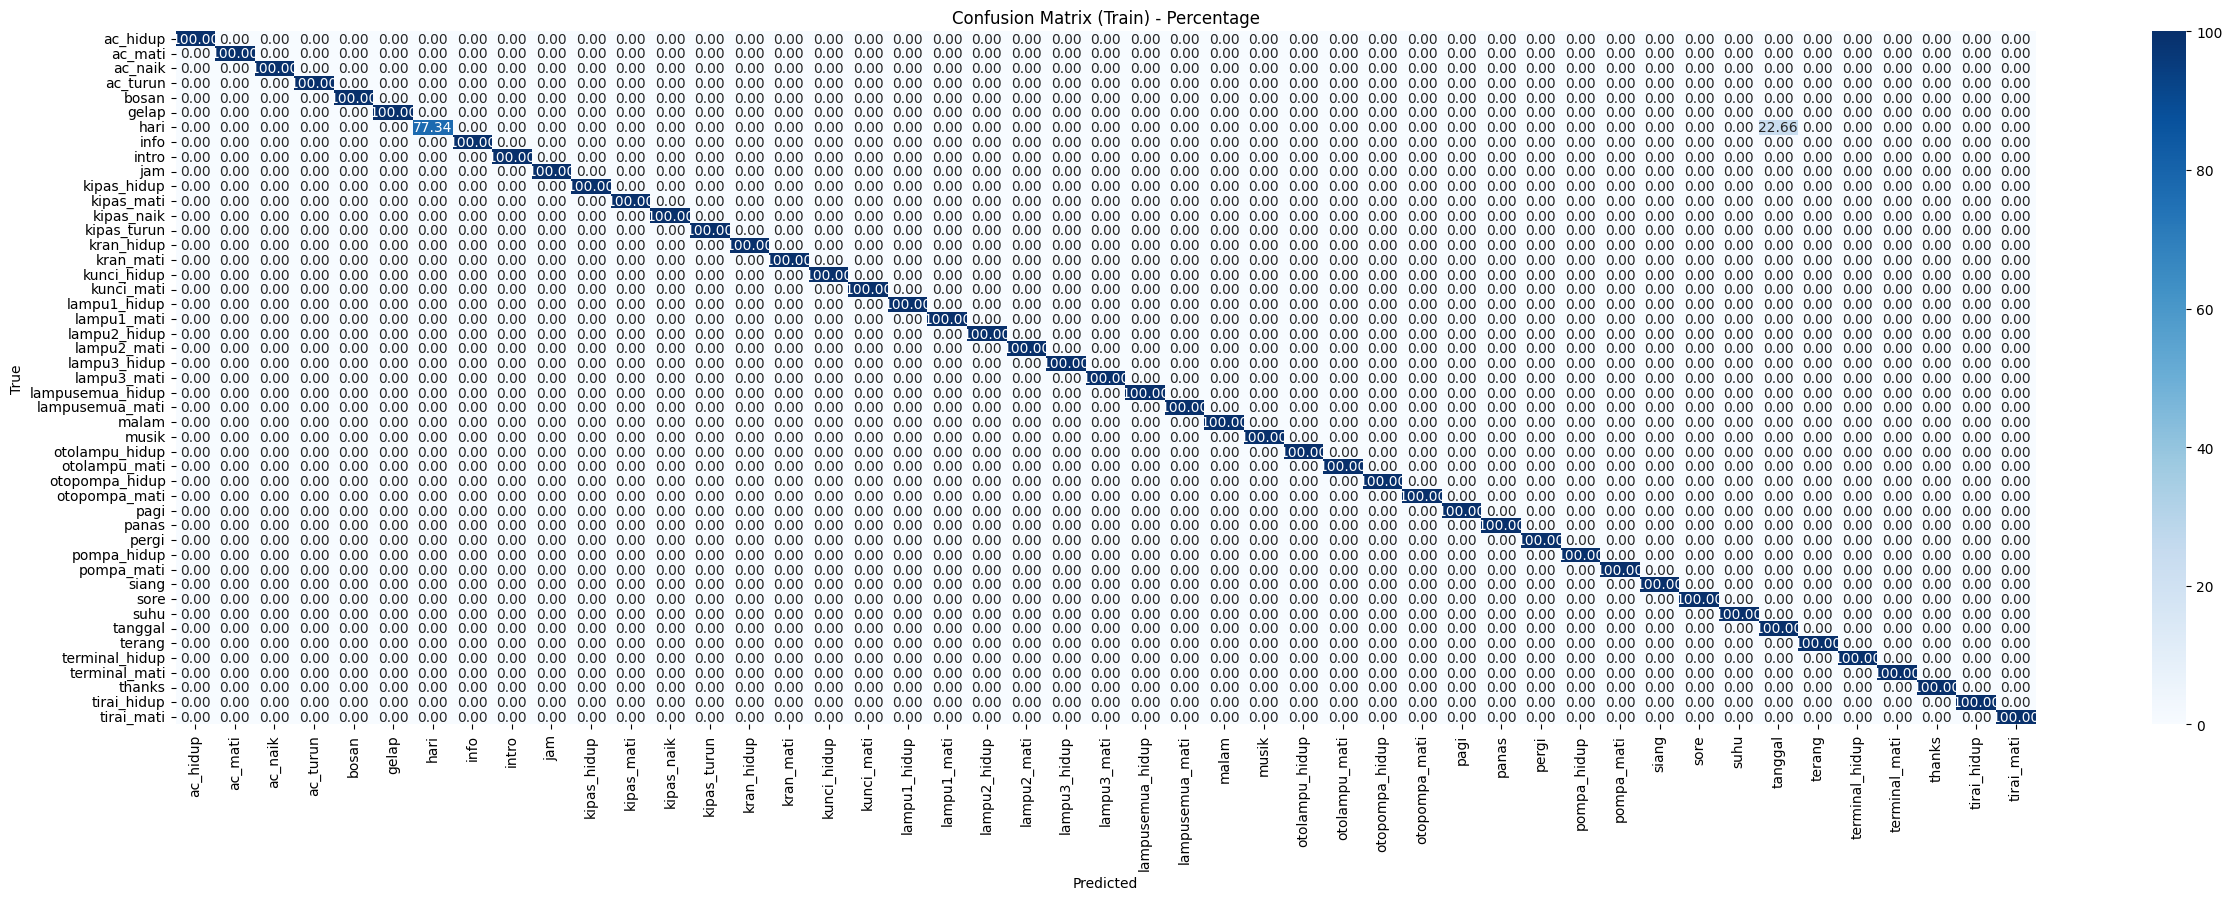

In [10]:
# Generate confusion matrix and visualize with percentage values
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(train_x)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(train_y, axis=1)

categories = classes  # Replace with your category labels

confusion = confusion_matrix(true_labels, predicted_labels)

# Calculate percentage values
confusion_percentage = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(30, 9))

# Use integer format if the percentage is exactly 0 or 100, otherwise use 2 decimal places
fmt = 'd' if np.allclose(confusion_percentage, 0) or np.allclose(confusion_percentage, 100) else '.2f'

sns.heatmap(confusion_percentage, annot=True, fmt=fmt, cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train) - Percentage')
plt.show()

479/479 [==============================] - 1s 3ms/step


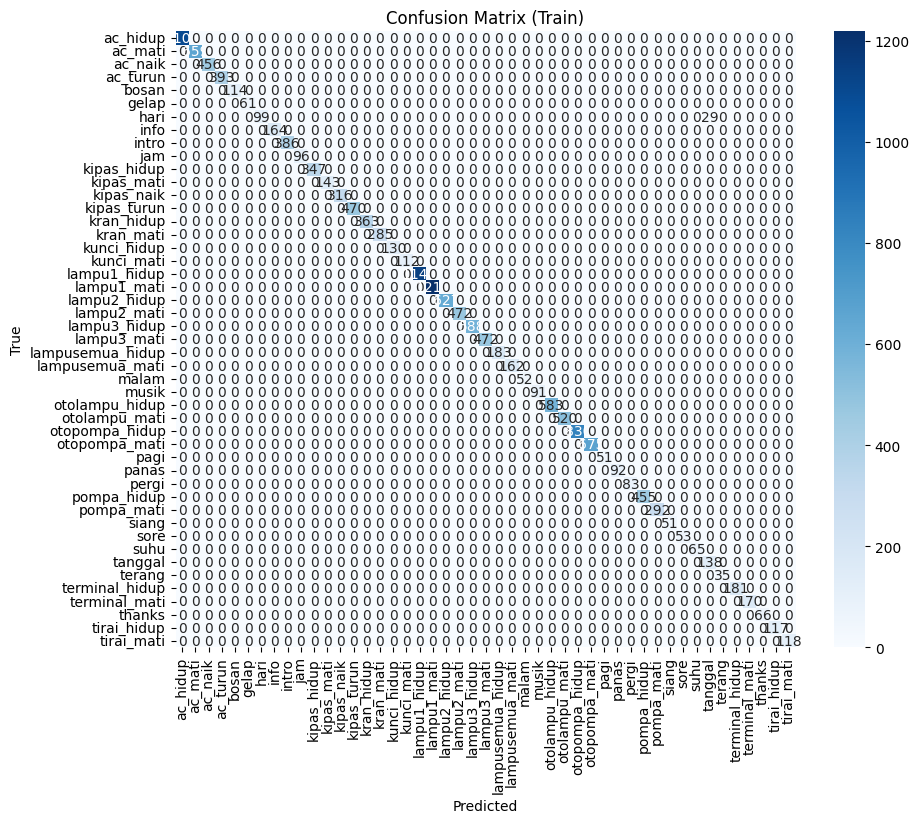

In [11]:
# Generate confusion matrix and visualize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(train_x)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(train_y, axis=1)

categories = classes  # Replace with your category labels

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train)')
plt.show()

In [12]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=categories)

# Calculate precision, recall, and F1-score separately
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print classification report
print("Classification Report:")
print(report)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print precision, recall, and F1-score with 4 digits after the decimal point
print("\nPrecision (Weighted):", round(precision, 4))
print("Recall (Weighted):", round(recall, 4))
print("F1-score (Weighted):", round(f1, 4))

Classification Report:
                  precision    recall  f1-score   support

        ac_hidup       1.00      1.00      1.00      1103
         ac_mati       1.00      1.00      1.00       659
         ac_naik       1.00      1.00      1.00       456
        ac_turun       1.00      1.00      1.00       393
           bosan       1.00      1.00      1.00       114
           gelap       1.00      1.00      1.00        61
            hari       1.00      0.77      0.87       128
            info       1.00      1.00      1.00       164
           intro       1.00      1.00      1.00       386
             jam       1.00      1.00      1.00        96
     kipas_hidup       1.00      1.00      1.00       347
      kipas_mati       1.00      1.00      1.00       143
      kipas_naik       1.00      1.00      1.00       316
     kipas_turun       1.00      1.00      1.00       470
      kran_hidup       1.00      1.00      1.00       363
       kran_mati       1.00      1.00      1.00 

In [13]:
import tensorflow as tf

# Specify the path to the saved model
model_path = 'model.h5'

# Load the model
model = tf.keras.models.load_model(model_path)


120/120 [==============================] - 0s 3ms/step


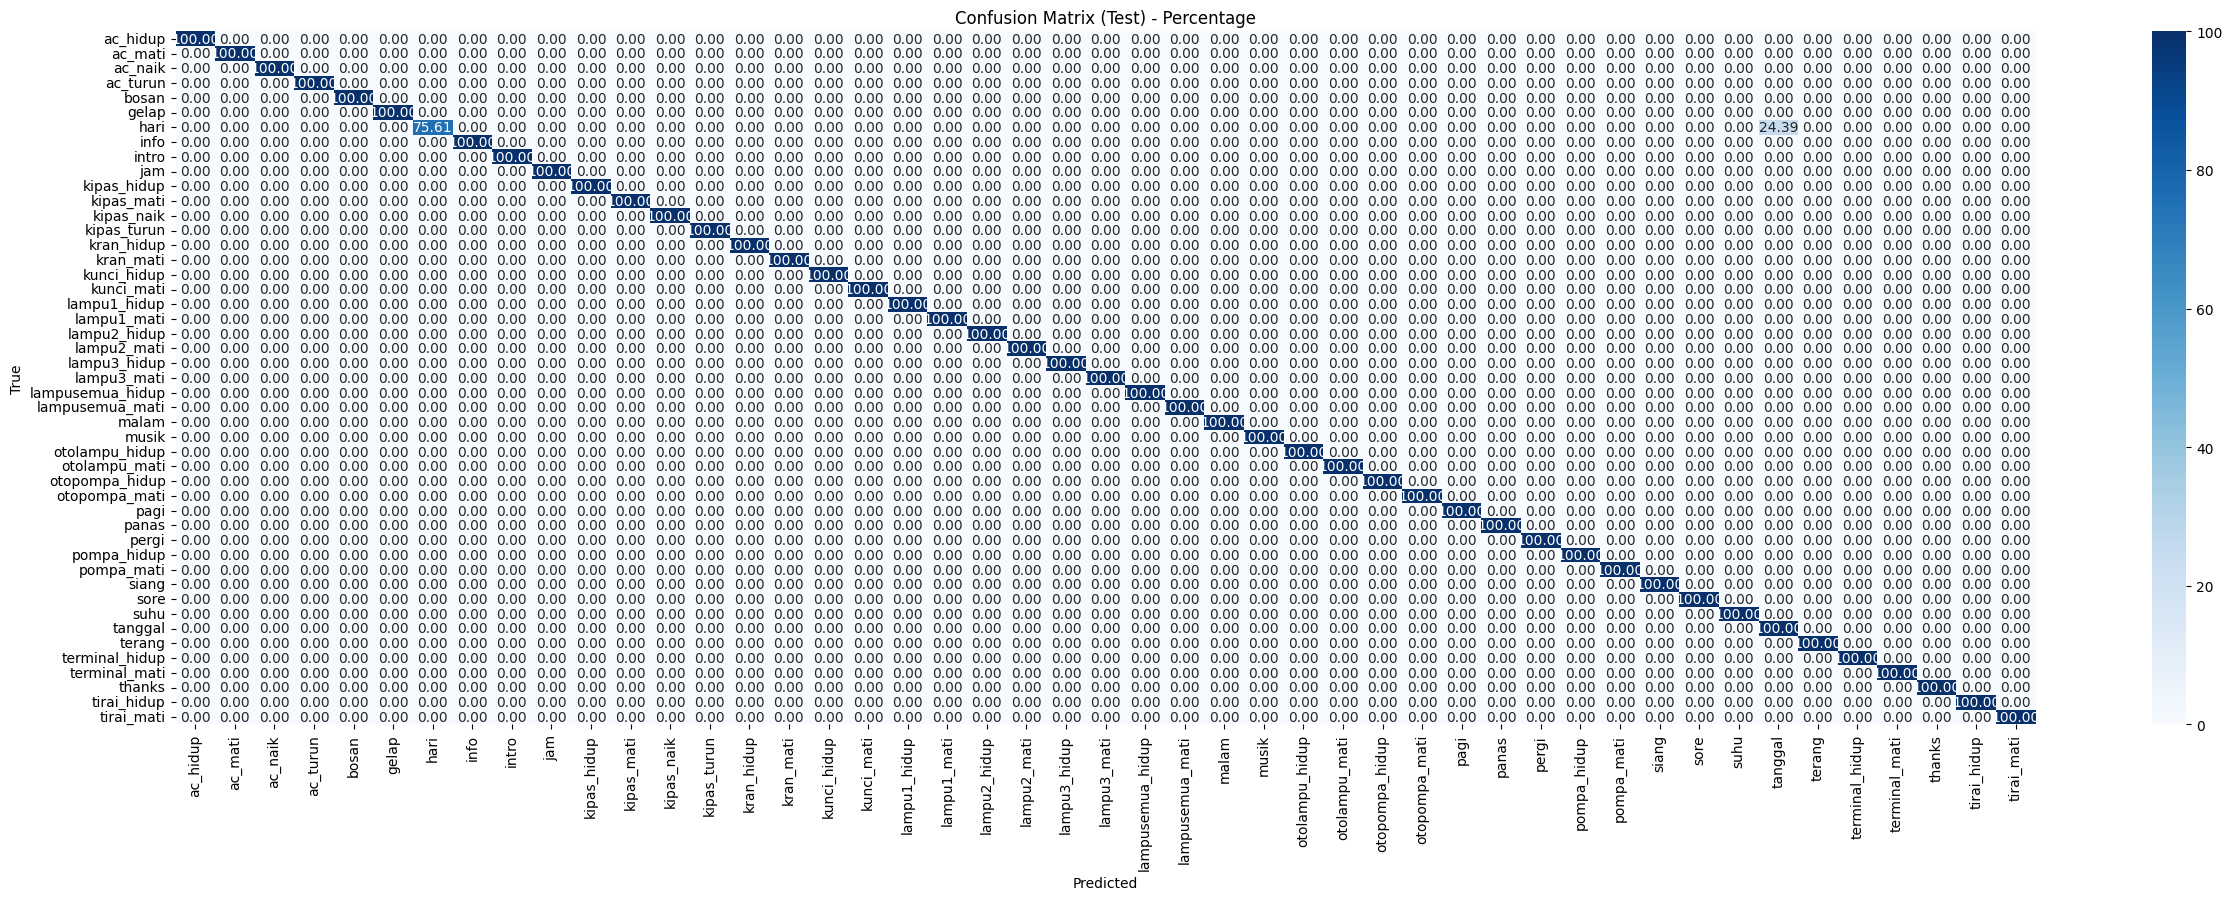

In [14]:
# Generate confusion matrix and visualize with percentage values
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

categories = classes  # Replace with your category labels

confusion = confusion_matrix(true_labels, predicted_labels)

# Calculate percentage values
confusion_percentage = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(30, 9))

# Use integer format if the percentage is exactly 0 or 100, otherwise use 2 decimal places
fmt = 'd' if np.allclose(confusion_percentage, 0) or np.allclose(confusion_percentage, 100) else '.2f'

sns.heatmap(confusion_percentage, annot=True, fmt=fmt, cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test) - Percentage')
plt.show()

120/120 [==============================] - 0s 3ms/step


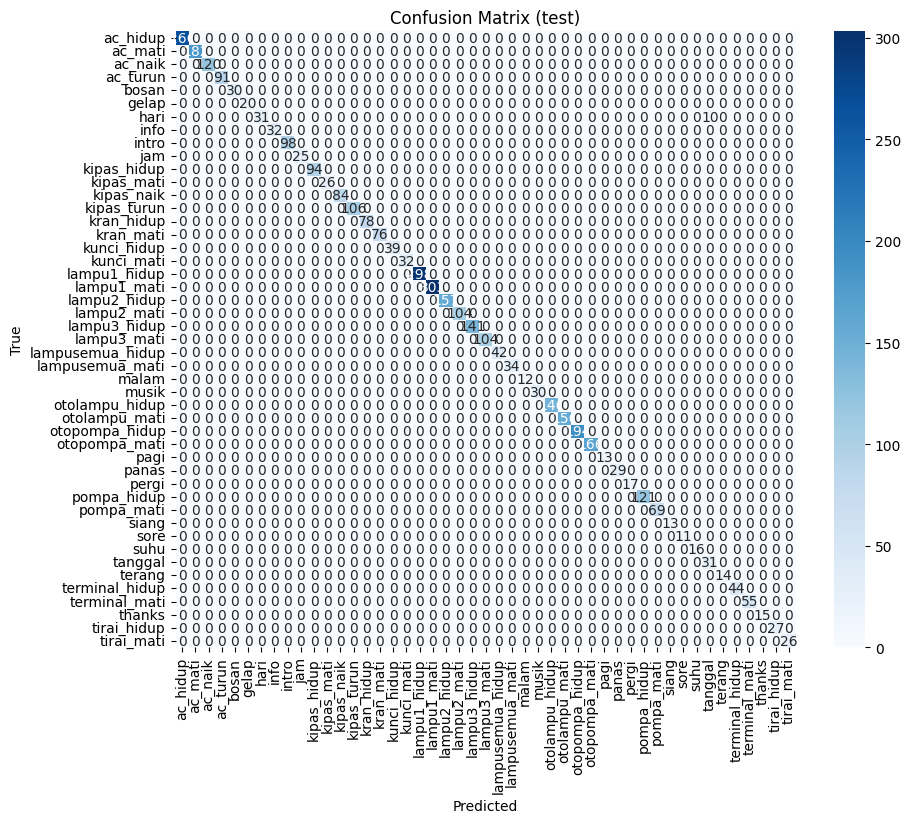

In [15]:
# Generate confusion matrix and visualize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_x)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_y, axis=1)

categories = classes  # Replace with your category labels

confusion = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (test)')
plt.show()

In [16]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=categories)

# Calculate precision, recall, and F1-score separately
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print classification report
print("Classification Report:")
print(report)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print precision, recall, and F1-score with 4 digits after the decimal point
print("\nPrecision (Weighted):", round(precision, 4))
print("Recall (Weighted):", round(recall, 4))
print("F1-score (Weighted):", round(f1, 4))

Classification Report:
                  precision    recall  f1-score   support

        ac_hidup       1.00      1.00      1.00       266
         ac_mati       1.00      1.00      1.00       182
         ac_naik       1.00      1.00      1.00       120
        ac_turun       1.00      1.00      1.00        91
           bosan       1.00      1.00      1.00        30
           gelap       1.00      1.00      1.00        20
            hari       1.00      0.76      0.86        41
            info       1.00      1.00      1.00        32
           intro       1.00      1.00      1.00        98
             jam       1.00      1.00      1.00        25
     kipas_hidup       1.00      1.00      1.00        94
      kipas_mati       1.00      1.00      1.00        26
      kipas_naik       1.00      1.00      1.00        84
     kipas_turun       1.00      1.00      1.00       106
      kran_hidup       1.00      1.00      1.00        78
       kran_mati       1.00      1.00      1.00 